# Using Suport Vector Machine applied to Digits

**Import library's**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn import svm
%matplotlib inline

/Users/neemiasbsilva/venv/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


**Load the dataset**

In [2]:
digits = datasets.load_digits()

In [12]:
print(digits.data)
print(digits.target)
print("Shape of Digits Dataset: {}".format(digits.images.shape))

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]
Shape of Digits Dataset: (1797, 8, 8)


**Show some images of mnist dataset**

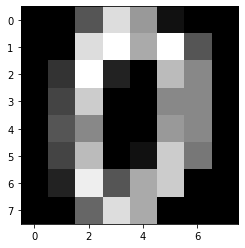

In [10]:
plt.imshow(digits.images[0], cmap='gray')

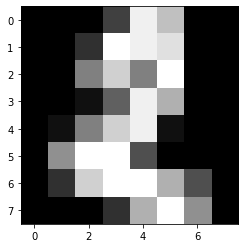

In [11]:
plt.imshow(digits.images[2], cmap='gray')

**Split the data in x and y**

In [ ]:
(x, y) = digits.data[:-1], digits.target[:-1]

**Create an instance of SVM and fit out data**

In [13]:
C = 1.0 # SVM regularization parameter

clf = svm.SVC(kernel='rbf', gamma=0.01, C=C)

In [ ]:
clf.fit(x_train, y_train)

**Using the model to predict the setof test**

In [23]:
clf = svm.SVC(random_state=0)

In [ ]:
x = np.reshape(x_train, [x_train.shape[0], x_train.shape[1]*x_train.shape[2]])
cross_val_score(clf, x, y_train, cv=5, scoring='recall_macro')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [22]:
from sklearn.model_selection import cross_val_score

cross_val_score(models, x_train, y_train, cv=5, scoring='recall_macro')

TypeError: estimator should be an estimator implementing 'fit' method, <generator object <genexpr> at 0x13b678a50> was passed